In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Single run experiment run: single simulation

## Initial parameters

In [3]:
# Number of simulation runs
n = 10
pace = 10
pd.options.mode.chained_assignment = None  # default='warn'

## Data preprocessing

In [4]:
#Read Counters file
# The avg columns contains the average education level of counter/spreader per day; the spreader one contains more samples since
# the simulation terminates when the number of spreader reaches 0, meaning that the counters become stifler before time
data = pd.read_csv('AB_rumor_spreading/fondamenta/endTime.txt', names = ['avgEducationalLevel', 'duration'])
data_spreader = pd.read_csv('AB_rumor_spreading/fondamenta/spreader.txt', names = ['Day', 'avgSpreader','Run'])
data_counter = pd.read_csv('AB_rumor_spreading/fondamenta/counter.txt', names = ['Day', 'avgCounter','Run'])
data

,avgEducationalLevel,duration
0,70.0,25.625000
1,60.0,28.833333
2,50.0,25.458333
3,40.0,27.333333
4,80.0,21.875000
5,90.0,13.666667
6,30.0,27.208333
7,20.0,29.750000
8,0.0,37.416667
9,10.0,36.541667


Text(0.5, 1.0, 'Rumor life vs Cultural level of a population')

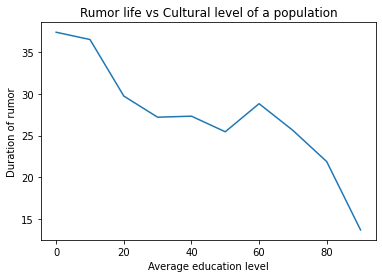

In [5]:
data.sort_values(by=['avgEducationalLevel'], inplace = True)
plt.plot(data['avgEducationalLevel'], data['duration'])
plt.xlabel('Average education level')
plt.ylabel('Duration of rumor')
plt.title('Rumor life vs Cultural level of a population')

In [7]:
r = np.corrcoef(data["avgEducationalLevel"], data["duration"])

In [8]:
r

array([[ 1.        , -0.89987485],
       [-0.89987485,  1.        ]])

In [5]:
# Replace the NaN values with 0s

data_counter.sort_values(by = ['Run', 'Day'], inplace = True )
data_counter.fillna(0, inplace =True)
data_counter.reset_index().drop(['index'], axis = 1)

,Day,avgCounter,Run
0,1.0,45.261701,0.0
1,2.0,46.020017,0.0
2,3.0,46.331553,0.0
3,4.0,47.007228,0.0
4,5.0,46.524859,0.0
...,...,...,...
263,9.0,78.510420,90.0
264,10.0,78.064873,90.0
265,11.0,76.673209,90.0
266,12.0,74.521682,90.0


In [6]:
data_spreader.sort_values(by = ['Run', 'Day'], inplace = True )
data_spreader.fillna(0, inplace =True)
data_spreader.reset_index().drop(['index'], axis = 1)

,Day,avgSpreader,Run
0,1.0,14.270204,0.0
1,2.0,14.438456,0.0
2,3.0,14.229286,0.0
3,4.0,14.202664,0.0
4,5.0,13.856277,0.0
...,...,...,...
263,9.0,0.936436,90.0
264,10.0,1.170545,90.0
265,11.0,2.341090,90.0
266,12.0,2.341090,90.0


## Example over a single level

In [7]:
avg = 80
counter30 = data_counter[data_counter['Run'] == avg]
spreader30 = data_spreader[data_spreader['Run'] == avg]
time = data[data['avgEducationalLevel'] == avg]['duration']
counter30

,Day,avgCounter,Run
105,1.0,72.832191,80.0
106,2.0,72.948169,80.0
107,3.0,72.675202,80.0
108,4.0,71.355948,80.0
109,5.0,71.637998,80.0
110,6.0,71.404748,80.0
111,7.0,71.543035,80.0
112,8.0,71.456019,80.0
113,9.0,70.708942,80.0
114,10.0,71.153063,80.0


In [8]:
counter30.drop(['Run'], axis =1, inplace = True)
spreader30.drop(['Run'], axis =1, inplace = True)

In [9]:
df = counter30.set_index('Day').join(spreader30.set_index('Day'))
df.index

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0],
             dtype='float64', name='Day')

In [10]:
df

,avgCounter,avgSpreader
Day,,
1.0,72.832191,6.483785
2.0,72.948169,6.249664
3.0,72.675202,6.387794
4.0,71.355948,6.260818
5.0,71.637998,3.930200
6.0,71.404748,3.930200
7.0,71.543035,3.930200
8.0,71.456019,5.567783
9.0,70.708942,6.681339


## Plotting results

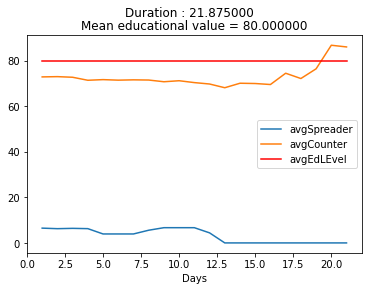

In [11]:
plt.title("Mean educational value = %f" % avg)
plt.suptitle("Duration : %f" % time)
plt.plot(df.index, df["avgSpreader"], label = "avgSpreader")
plt.plot(df.index, df["avgCounter"], label = "avgCounter")
plt.plot(df.index, np.ones((len(df.index),)) * avg, label = "avgEdLEvel", color = (1,0,0))
plt.xlabel('Days')
plt.legend()
plt.show()

## Plotting each run

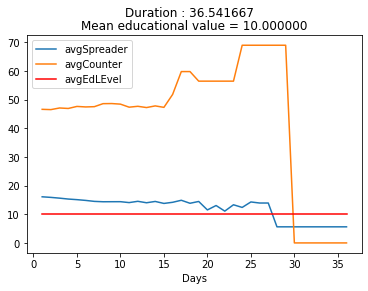

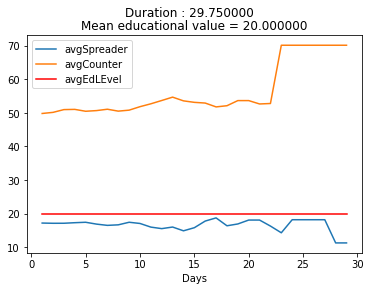

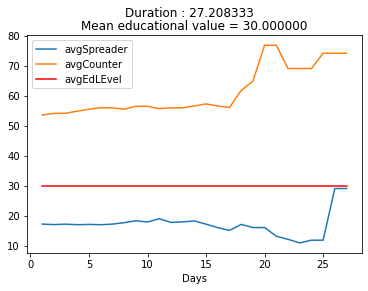

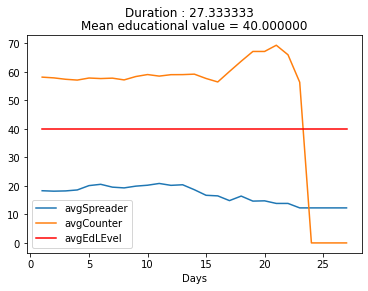

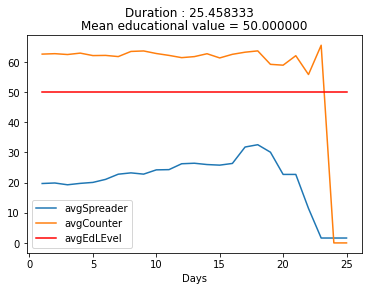

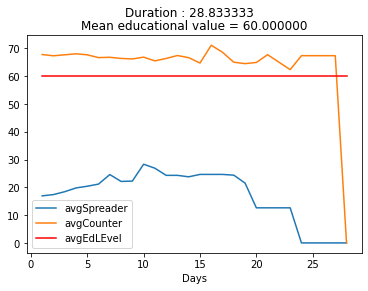

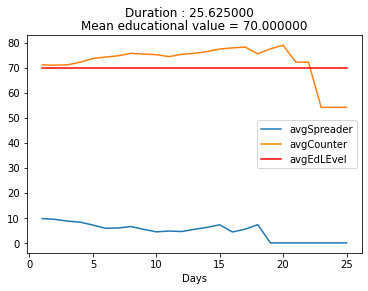

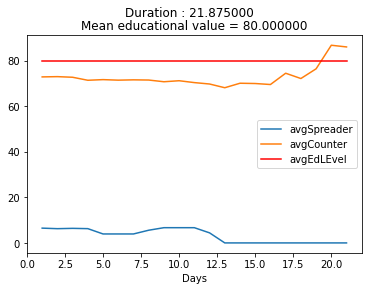

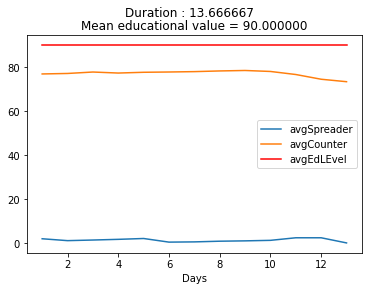

In [12]:
%matplotlib inline

for i in range(1,n):
    #prepare
    avg = i*pace
    counter30 = data_counter[data_counter['Run'] == avg]
    spreader30 = data_spreader[data_spreader['Run'] == avg]
    time = data[data['avgEducationalLevel'] == avg]['duration']

    counter30.drop(['Run'], axis =1, inplace = True)
    spreader30.drop(['Run'], axis =1, inplace = True)

    df = counter30.set_index('Day').join(spreader30.set_index('Day'))
    #plot
    
    
    plt.title("Mean educational value = %f" % avg)
    plt.suptitle("Duration : %f" % time)
    plt.plot(df.index, df["avgSpreader"], label = "avgSpreader")
    plt.plot(df.index, df["avgCounter"], label = "avgCounter")
    plt.plot(df.index, np.ones((len(df.index),)) * avg, label = "avgEdLEvel", color = (1,0,0))
    plt.xlabel('Days')
    plt.legend()
    plt.show()

# Random Seed: multiple simulations

In [5]:
data_multiple = pd.read_csv('AB_rumor_spreading/fondamenta/multipleEnd.txt', names = ['avgEducationalLevel', 'duration'])
data_multiple.head(10)

,avgEducationalLevel,duration
0,70.0,21.875000
1,60.0,28.208333
2,30.0,41.916667
3,50.0,38.458333
4,40.0,34.541667
5,80.0,15.958333
6,0.0,30.208333
7,90.0,24.375000
8,20.0,28.458333
9,10.0,45.583333


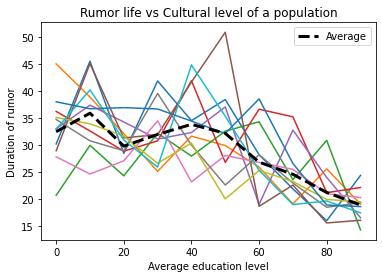

In [22]:
n = 10
runs = len(data_multiple) / n
for i in range(0,data_multiple.shape[0], n):
    #prepare
    tmp = data_multiple.loc[i: i+(n-1),:]
    tmp.sort_values(by=['avgEducationalLevel'], inplace = True)
    #plot
    plt.plot(tmp['avgEducationalLevel'], tmp['duration'])
    plt.xlabel('Average education level')
    plt.ylabel('Duration of rumor')
    plt.title('Rumor life vs Cultural level of a population')
    
    
# Mean value
base = data_multiple.loc[0:n-1,:]
base.sort_values(by=['avgEducationalLevel'], inplace = True)

for i in range(n,data_multiple.shape[0], n):
    #prepare
    tmp = data_multiple.loc[i: i+(n-1),:]
    tmp.sort_values(by=['avgEducationalLevel'], inplace = True)
    base = base.merge(tmp, on='avgEducationalLevel', how='left')    
    
base_avg = pd.DataFrame(base.iloc[:, 1:-1].mean(axis =1), columns=['Duration'])
base_avg['avgEducationalLevel'] = base['avgEducationalLevel']
plt.plot(base_avg['avgEducationalLevel'], base_avg['Duration'], linewidth=3, color='k', linestyle='dashed', label= 'Average' )

plt.legend()

## System Dynamics visualization

In [7]:
data_sd = pd.read_csv('AB_rumor_spreading/fondamenta/sd_endTime.txt', names = ['avgEducationalLevel', 'duration'])
data_sd

,avgEducationalLevel,duration
0,0.3,45.179
1,0.4,43.876
2,0.5,42.370
3,0.0,48.270
4,0.1,47.347
5,0.6,40.595
6,0.7,38.459
7,0.2,46.325
8,1.0,19.559
9,0.8,35.773


Text(0.5, 1.0, 'Rumor life vs Cultural level of a population')

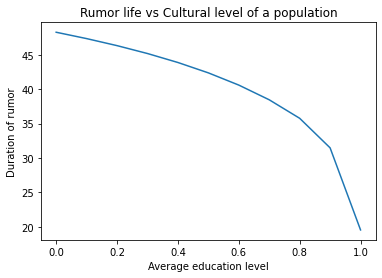

In [10]:
data_sd.sort_values(by=['avgEducationalLevel'], inplace = True)
plt.plot(data_sd['avgEducationalLevel'], data_sd['duration'])
plt.xlabel('Average education level')
plt.ylabel('Duration of rumor')
plt.title('Rumor life vs Cultural level of a population')

In [12]:
r = np.corrcoef(data_sd["avgEducationalLevel"], data_sd["duration"])
r

array([[ 1.       , -0.9116381],
       [-0.9116381,  1.       ]])

Overlapping

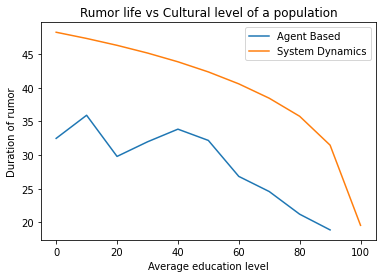

In [17]:
data.sort_values(by=['avgEducationalLevel'], inplace = True)
plt.plot(base_avg['avgEducationalLevel'], base_avg['Duration'], label= 'Agent Based' )
plt.plot(data_sd['avgEducationalLevel'] *100, data_sd['duration'], label = 'System Dynamics')
plt.xlabel('Average education level')
plt.ylabel('Duration of rumor')
plt.title('Rumor life vs Cultural level of a population')
plt.legend()

Differences in the models:
1. The initial population size (1000 vs 10000)
2. The role of educational level
3. The interest parameter
4. the actual formulation

Yet both approaches show the same behaviour wrt the educational level